# Fundamentals of Visualization libraries Part 1 (Matplotlib)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.8'

In [3]:
df = pd.read_pickle(r"C:\Users\ZenBook\NY_data_merged.pkl")

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'temp_max', 'temp_min',
       'total_precipitation', 'wind_speed', '_merge'],
      dtype='object')

In [5]:
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,temp_max,temp_min,total_precipitation,wind_speed
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802116,-73.968178,40.804039,-73.945923,member,2022-01-21,-6.0,-4.9,-9.3,0.0,6.2
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673744,-73.985649,40.688488,-73.991158,member,2022-01-10,1.6,5.6,-3.2,0.0,7.5
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960938,40.745167,-73.986832,member,2022-01-26,-2.3,-1.0,-6.0,0.0,5.6
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783962,-73.947166,40.745167,-73.986832,member,2022-01-03,1.4,3.9,-4.3,0.0,6.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749641,-73.988052,40.745167,-73.986832,member,2022-01-22,-5.9,-1.0,-9.9,0.0,3.4


In [7]:
# Ensure both columns are datetime and truncate to seconds

df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].apply(
    lambda col: pd.to_datetime(col).dt.floor('s'))

In [8]:
# change column names 
df = df.rename(columns={
    'ride_id': 'trip_id',
    'rideable_type': 'type_of_bike',
    'started_at': 'start_time',
    'ended_at': 'end_time'})

In [9]:
# remove "_bike" in the "type_of_bike" column
df['type_of_bike'] = df['type_of_bike'].str.replace('_bike', '', regex=False)

In [10]:
# Create new column with trip duration

df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()

In [11]:
df.head()

,trip_id,type_of_bike,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,temp_max,temp_min,total_precipitation,wind_speed,trip_duration
0,BFD29218AB271154,electric,2022-01-21 13:13:43,2022-01-21 13:22:31,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802116,-73.968178,40.804039,-73.945923,member,2022-01-21,-6.0,-4.9,-9.3,0.0,6.2,528.0
1,7C953F2FD7BE1302,classic,2022-01-10 11:30:54,2022-01-10 11:41:43,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673744,-73.985649,40.688488,-73.991158,member,2022-01-10,1.6,5.6,-3.2,0.0,7.5,649.0
2,95893ABD40CED4B8,electric,2022-01-26 10:52:43,2022-01-26 11:06:35,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960938,40.745167,-73.986832,member,2022-01-26,-2.3,-1.0,-6.0,0.0,5.6,832.0
3,F853B50772137378,classic,2022-01-03 08:35:48,2022-01-03 09:10:50,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783962,-73.947166,40.745167,-73.986832,member,2022-01-03,1.4,3.9,-4.3,0.0,6.4,2102.0
4,7590ADF834797B4B,classic,2022-01-22 14:14:23,2022-01-22 14:34:57,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749641,-73.988052,40.745167,-73.986832,member,2022-01-22,-5.9,-1.0,-9.9,0.0,3.4,1234.0


In [12]:
df.shape

(12000000, 20)

In [13]:
df.dtypes

trip_id                        object
type_of_bike                   object
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station_name           category
start_station_id             category
end_station_name             category
end_station_id               category
start_lat                     float32
start_lng                     float32
end_lat                       float32
end_lng                       float32
member_casual                category
date                   datetime64[ns]
avgTemp                       float64
temp_max                      float64
temp_min                      float64
total_precipitation           float64
wind_speed                    float64
trip_duration                 float64
dtype: object

## Basic plotting with pandas

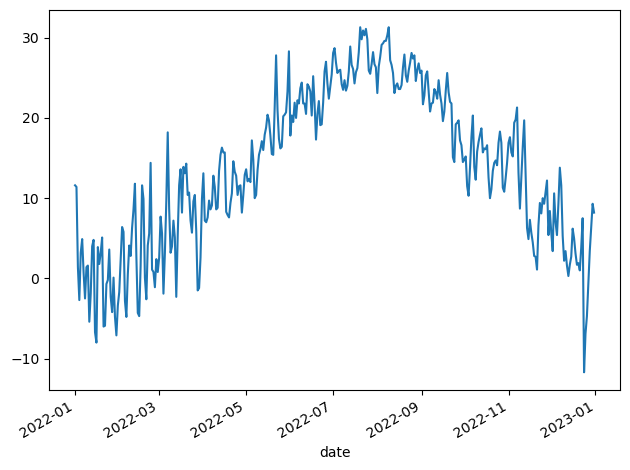

In [14]:
# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as index
df_temp = df.set_index('date')

# Ensure datetime index is sorted
df_temp = df_temp.sort_index()

# Quick plot with pandas
df_temp['avgTemp'].plot()

plt.xlabel("date")
plt.tight_layout()
plt.show()

Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. For this example, used a pandas plotting function.

## Procedural Approach 

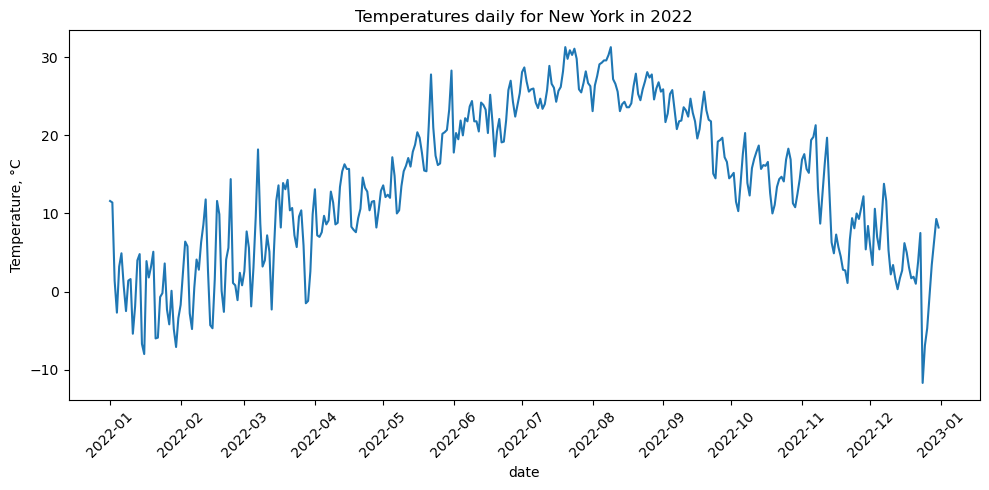

In [15]:
# Create figure and plot

import matplotlib.dates as mdates

# Create figure and plot
plt.figure(figsize=(10, 5))
plt.title('Temperatures daily for New York in 2022')

# Explicitly select the column
plt.plot(df_temp.index, df_temp['avgTemp'].values)

# Format x-axis ticks as 'YYYY-MM'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.xlabel("date")
plt.ylabel("Temperature, °C")
plt.tight_layout()
plt.show()

## Aggregate trips

In [16]:
df.columns

Index(['trip_id', 'type_of_bike', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'temp_max', 'temp_min',
       'total_precipitation', 'wind_speed', 'trip_duration'],
      dtype='object')

In [17]:
# Groupby the count of the trips 

# Filter for 2022 only
df_2022 = df[df['date'].dt.year == 2022]

# Group by date and count trips
df_group = (
    df_2022.groupby('date')['trip_id'].count().reset_index())

In [18]:
df_group.head()

,date,trip_id
0,2022-01-01,19905
1,2022-01-02,41920
2,2022-01-03,32309
3,2022-01-04,35935
4,2022-01-05,33411


In [19]:
df_group.tail()

,date,trip_id
360,2022-12-27,20903
361,2022-12-28,27658
362,2022-12-29,32880
363,2022-12-30,39522
364,2022-12-31,19812


In [20]:
# Filter for 2022 only
df_2022 = df[df['date'].dt.year == 2022]

# Group by date and count trips
df_group = df_2022.groupby('date')['trip_id'].count().reset_index()

# Create new column for daily trips
df_group.rename(columns={'trip_id': 'daily_trips'}, inplace=True)

# Merge counts back into 2022 trips
df_2022 = df_2022.merge(df_group, on="date", how="left", indicator=True)

# Check merge status
print(df_2022['_merge'].value_counts(dropna=False))

# Sanity checks for specific dates
print("Shape of January 1st is", df_2022[df_2022['date'] == '2022-01-01'].shape)
print("Shape of January 2nd is", df_2022[df_2022['date'] == '2022-01-02'].shape)

# Set date as index again for plotting
df_temp = df_2022.set_index('date')

print(df_temp.columns)

_merge
both          11999379
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (19905, 22)
Shape of January 2nd is (41920, 22)
Index(['trip_id', 'type_of_bike', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'temp_max', 'temp_min',
       'total_precipitation', 'wind_speed', 'trip_duration', 'daily_trips',
       '_merge'],
      dtype='object')


In [21]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11999379 entries, 2022-01-21 to 2022-12-23
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   trip_id              object        
 1   type_of_bike         object        
 2   start_time           datetime64[ns]
 3   end_time             datetime64[ns]
 4   start_station_name   category      
 5   start_station_id     category      
 6   end_station_name     category      
 7   end_station_id       category      
 8   start_lat            float32       
 9   start_lng            float32       
 10  end_lat              float32       
 11  end_lng              float32       
 12  member_casual        category      
 13  avgTemp              float64       
 14  temp_max             float64       
 15  temp_min             float64       
 16  total_precipitation  float64       
 17  wind_speed           float64       
 18  trip_duration        float64       
 19  daily

In [22]:
df_temp.head()

,trip_id,type_of_bike,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,avgTemp,temp_max,temp_min,total_precipitation,wind_speed,trip_duration,daily_trips,_merge
date,,,,,,,,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric,2022-01-21 13:13:43,2022-01-21 13:22:31,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802116,-73.968178,...,-73.945923,member,-6.0,-4.9,-9.3,0.0,6.2,528.0,32800,both
2022-01-10,7C953F2FD7BE1302,classic,2022-01-10 11:30:54,2022-01-10 11:41:43,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673744,-73.985649,...,-73.991158,member,1.6,5.6,-3.2,0.0,7.5,649.0,33897,both
2022-01-26,95893ABD40CED4B8,electric,2022-01-26 10:52:43,2022-01-26 11:06:35,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960938,...,-73.986832,member,-2.3,-1.0,-6.0,0.0,5.6,832.0,40975,both
2022-01-03,F853B50772137378,classic,2022-01-03 08:35:48,2022-01-03 09:10:50,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783962,-73.947166,...,-73.986832,member,1.4,3.9,-4.3,0.0,6.4,2102.0,32309,both
2022-01-22,7590ADF834797B4B,classic,2022-01-22 14:14:23,2022-01-22 14:34:57,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749641,-73.988052,...,-73.986832,member,-5.9,-1.0,-9.9,0.0,3.4,1234.0,31264,both


In [23]:
df_temp.tail()

,trip_id,type_of_bike,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,trip_duration,daily_trips,_merge
date,,,,,,,,,,,,,,,,,
2022-12-04,2C18D66E198EA410,classic,2022-12-04 20:11:00,2022-12-04 20:19:15,6 Ave & W 33 St,6364.07,9 Ave & W 39 St,6644.08,40.749013,-73.988484,40.756404,-73.994101,member,7.0,495.0,39354,both
2022-12-14,3C0686D88E2F6AB5,classic,2022-12-14 18:51:45,2022-12-14 18:57:44,E 20 St & Park Ave,6055.08,Ave A & E 14 St,5779.11,40.738274,-73.987520,40.730311,-73.980472,member,1.7,359.0,42202,both
2022-12-31,42AAD1775F1D3138,classic,2022-12-31 18:13:19,2022-12-31 18:19:11,E 20 St & Park Ave,6055.08,Ave A & E 14 St,5779.11,40.738274,-73.987520,40.730311,-73.980472,member,8.2,352.0,19812,both
2022-12-04,DA4C5D66E1C60D25,classic,2022-12-04 23:51:05,2022-12-05 00:20:25,Vesey St & Church St,5216.06,W 45 St & 8 Ave,6676.02,40.712220,-74.010472,40.759291,-73.988597,member,7.0,1760.0,39354,both
2022-12-23,A570DB28B3868263,electric,2022-12-23 17:46:18,2022-12-23 17:51:21,E 20 St & Park Ave,6055.08,E 11 St & 1 Ave,5746.14,40.738039,-73.987402,40.729538,-73.984267,member,7.5,303.0,16586,both


In [23]:
df_temp.to_pickle('df_temp.pkl')

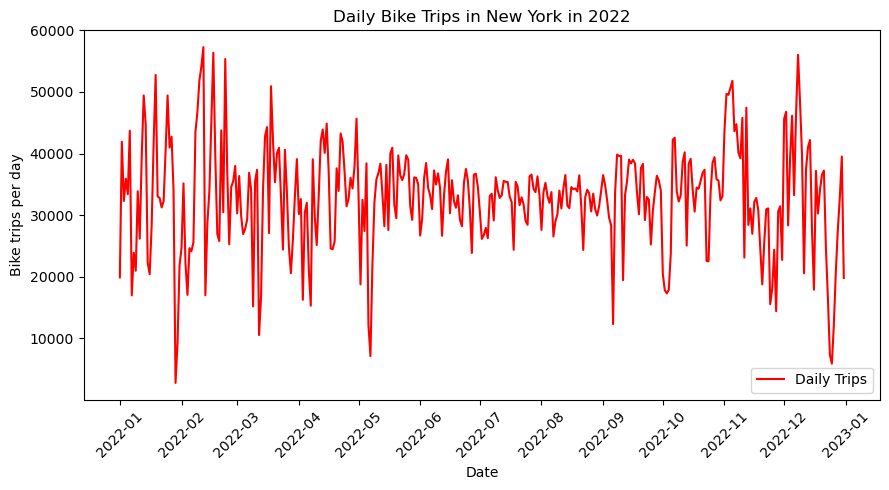

In [24]:
df_group = df_group.sort_values('date')

plt.figure(figsize=(9,5))
plt.title('Daily Bike Trips in New York in 2022')
plt.plot(df_group['date'], df_group['daily_trips'], color='red', label='Daily Trips')

# Format x-axis ticks as YYYY-MM
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Bike trips per day')
plt.legend()
plt.tight_layout()
plt.show()


## Object-Oriented Approach

Createing a line chart of **Daily bike trip counts** and **Temperatures** plotted on a dual axis.

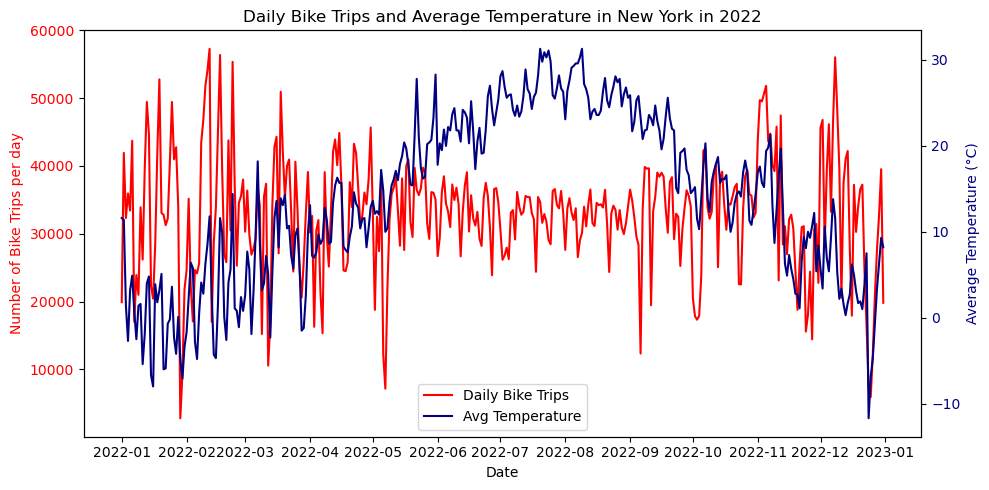

In [25]:
# Create dual-axis plot 
fig, ax = plt.subplots(figsize=(10, 5))

# Sort the dataframe by the index (date) before plotting
df_temp = df_temp.sort_index()

# Primary y-axis: Daily trips
ax.plot(df_temp.index, df_temp['daily_trips'], color="red", label='Daily Bike Trips')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bike Trips per day', color='red')
ax.tick_params(axis='y', labelcolor='red')

# Secondary y-axis: Temperature
ax2 = ax.twinx()
ax2.plot(df_temp.index, df_temp['avgTemp'], color="navy", label='Avg Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='navy')
ax2.tick_params(axis='y', labelcolor='navy')

# Title
ax.set_title('Daily Bike Trips and Average Temperature in New York in 2022')

# Format x-axis ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='lower center')

plt.tight_layout()
plt.show()


This code uses Matplotlib’s object-oriented paradigm to create a dual-axis line chart that shows the relationship between daily bike rides and average temperature. The first axis (ax) plots Daily Bike Trips, while a secondary axis (ax2) created with twinx() overlays Average Temperature data, allowing two different y-scales on the same chart. I also combined the legends from both axes and positioned them in the lower center.This approach gives fine-grained control over labels, colors, and layout compared to the simpler pyplot state-machine style. Moreoverr, it allows two variables with different scales to be compared visually on the same timeline.

## Creation a histogram of the variable “trip_duration” using matplotlib.

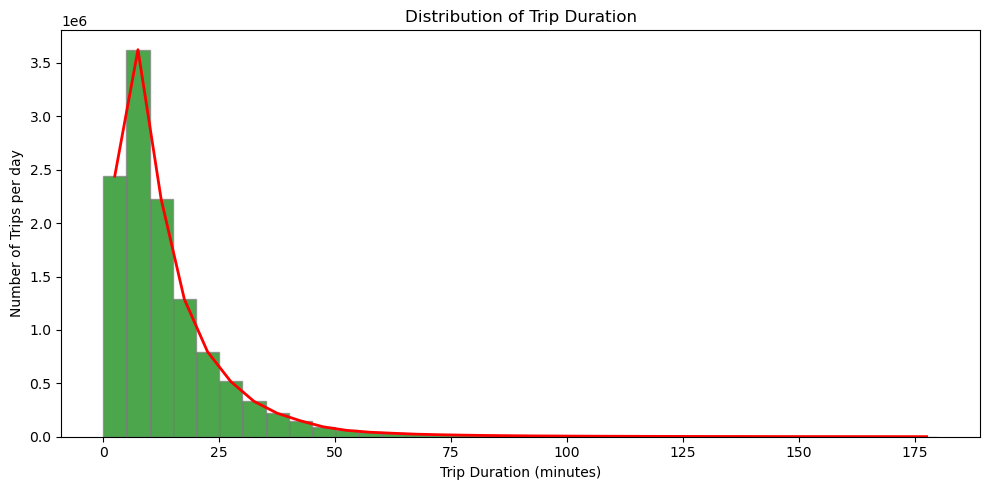

Total trips: 11999379
Trips under 180 minutes: 11947153 (99.6%)
Trips filtered out: 52226 (0.4%)


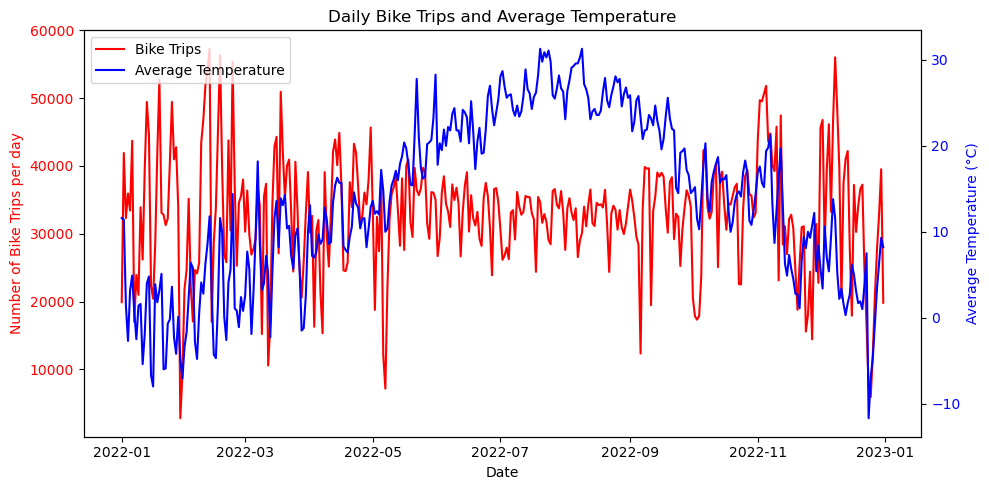

In [26]:
# Histogram of Trip Duration

# Convert trip duration to minutes
df_temp['trip_duration_min'] = (df_temp['end_time'] - df_temp['start_time']).dt.total_seconds() / 60

# Filter out unrealistic trip durations (e.g., keep only trips under 3 hours = 180 minutes)
df_filtered = df_temp[df_temp['trip_duration_min'] <= 180].copy()

# Define bins every 5 minutes
bins = np.arange(0, 185, 5)  # 0 to 180 minutes in 5-minute bins

# Plot histogram
plt.figure(figsize=(10, 5))
plt.title('Distribution of Trip Duration')
counts, bins, patches = plt.hist(
    df_filtered['trip_duration_min'], 
    bins=bins, 
    color='green', 
    edgecolor='grey', 
    alpha=0.7)

# Add red curve following bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, counts, color='red', linewidth=2)

# Labels
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips per day')
plt.tight_layout()
plt.show()

# Optional: Print statistics about filtered data
print(f"Total trips: {len(df_temp)}")
print(f"Trips under 180 minutes: {len(df_filtered)} ({len(df_filtered)/len(df_temp)*100:.1f}%)")
print(f"Trips filtered out: {len(df_temp) - len(df_filtered)} ({(len(df_temp) - len(df_filtered))/len(df_temp)*100:.1f}%)")

# Plot: Rides vs. Temperature
# Sort by date index
df_temp_agg = df_temp.sort_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot daily rides
ax.plot(df_temp_agg.index, df_temp_agg['daily_trips'], color='red', label='Bike Trips')

# Second y-axis for temperature
ax2 = ax.twinx()
ax2.plot(df_temp_agg.index, df_temp_agg['avgTemp'], color='blue', label='Average Temperature')

# Titles and labels
ax.set_title('Daily Bike Trips and Average Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bike Trips per day', color='red')
ax2.set_ylabel('Average Temperature (°C)', color='blue')

# Color the y-axis tick labels to match the lines
ax.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.show()

## Create a figure with two axes that represent different plots: one of the plots is a bar chart with the variable “usertype,” and the other one is a pie chart illustrating the variable “gender.”

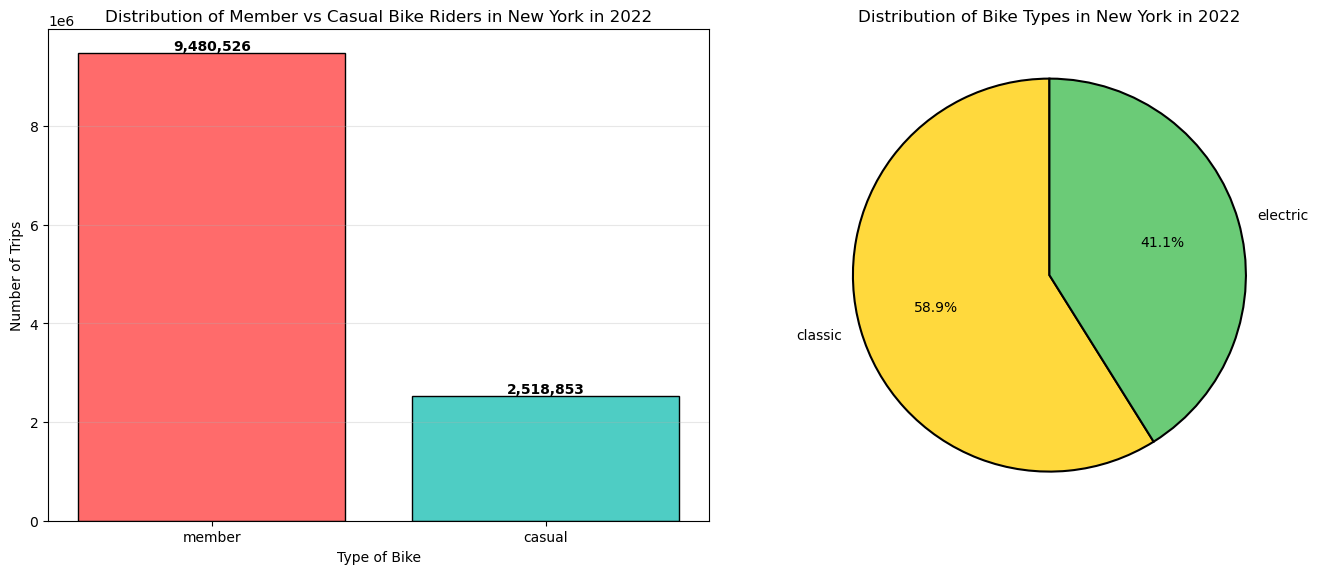

In [27]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left subplot: Bar chart for member_casual
member_counts = df_temp['member_casual'].value_counts()
axes[0].bar(member_counts.index, member_counts.values, color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
axes[0].set_title('Distribution of Member vs Casual Bike Riders in New York in 2022')
axes[0].set_xlabel('Type of Bike')
axes[0].set_ylabel('Number of Trips')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(member_counts.values):
    axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Right subplot: Pie chart for type_of_bike
bike_counts = df_temp['type_of_bike'].value_counts()
colors = ['#FFD93D', '#6BCB77', '#4D96FF']

axes[1].pie(bike_counts.values,
            labels=bike_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title('Distribution of Bike Types in New York in 2022')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()